# ***"Decoding Metabolic Disorders via Gene–Disease Network Analysis: A Comparative Study of Obesity, Type 2 Diabetes Mellitus, and Hypertension"***

## Research Objective

This project aims to investigate the genetic overlap and network-level relationships among three major metabolic disorders—Obesity, Type 2 Diabetes Mellitus (T2DM), and Hypertension—using gene–disease network analysis.

Specifically, the study explores:
- Disease-specific gene networks
- Shared genes across disorders
- Network topological properties to identify key hub genes
- Graph embeddings to uncover latent similarities among genes

Understanding shared genetic mechanisms may help explain metabolic comorbidity.


In [30]:
!python --version


Python 3.12.12


In [31]:
import zipfile
import os

files_to_unzip = ['obesity.zip', 'Hypertension.zip', 'Type2Diabetes.zip']
destination_dir = '/content/'

for zip_file in files_to_unzip:
    zip_path = os.path.join(destination_dir, zip_file)
    if os.path.exists(zip_path):
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(destination_dir)
            print(f"Successfully unzipped {zip_file}")
        except zipfile.BadZipFile:
            print(f"Error: {zip_file} is not a valid zip file.")
        except Exception as e:
            print(f"An error occurred while unzipping {zip_file}: {e}")
    else:
        print(f"Error: {zip_file} not found at {zip_path}")

Successfully unzipped obesity.zip
Successfully unzipped Hypertension.zip
Successfully unzipped Type2Diabetes.zip


Extract zip files


In [32]:
import zipfile
import os

zip_files = ["obesity.zip", "Hypertension.zip", "Type2Diabetes.zip"]

for z in zip_files:
    if os.path.exists(z):
        folder = z.replace(".zip", "")
        with zipfile.ZipFile(z, 'r') as zip_ref:
            zip_ref.extractall(folder)
        print(f"✅ Extracted: {folder}")
    else:
        print(f"⚠️ File not found: {z}")

# Check extracted folders
!ls


✅ Extracted: obesity
✅ Extracted: Hypertension
✅ Extracted: Type2Diabetes
Hypertension
hypertension_clean.csv
Hypertension.zip
obesity
obesity_clean.csv
obesity.zip
sample_data
search_info_C0028754-C4014361-C4016768.txt
search_info_C0028754-C4014361.txt
search_info_C0028754.txt
search_result_C0028754-C4014361-C4016768.tsv
search_result_C0028754-C4014361.tsv
search_result_C0028754.tsv
t2dm_clean.csv
Type2Diabetes
Type2Diabetes.zip


Finding csvs

In [33]:
import os

for folder in ["obesity", "Hypertension", "Type2Diabetes"]:
    if os.path.exists(folder):
        print(f"\n📂 Contents of {folder}:")
        print(os.listdir(folder))
    else:
        print(f"\n⚠️ Folder not found: {folder}")


📂 Contents of obesity:
['search_info_C0028754.txt', 'search_result_C0028754.tsv']

📂 Contents of Hypertension:
['search_info_C0028754-C4014361.txt', 'search_result_C0028754-C4014361.tsv']

📂 Contents of Type2Diabetes:
['search_result_C0028754-C4014361-C4016768.tsv', 'search_info_C0028754-C4014361-C4016768.txt']


Load Datasets

In [34]:
import pandas as pd

# Load the datasets into pandas DataFrames using the correct filenames
ob = pd.read_csv("obesity/search_result_C0028754.tsv", sep='\t')
t2d = pd.read_csv("Type2Diabetes/search_result_C0028754-C4014361-C4016768.tsv", sep='\t')
htn = pd.read_csv("Hypertension/search_result_C0028754-C4014361.tsv", sep='\t')

print("✅ Datasets loaded successfully!")
print("obesity:", ob.shape)
print("Diabetes:", t2d.shape)
print("Hypertension:", htn.shape)

✅ Datasets loaded successfully!
obesity: (10, 16)
Diabetes: (10, 16)
Hypertension: (10, 16)


Cleanup data

In [35]:
# Standardize column names
for df in [ob, t2d, htn]:
    df.columns = df.columns.str.strip().str.lower()

print("✅ Columns standardized")
print(ob.columns)


✅ Columns standardized
Index(['ei', 'numcts', 'gene_symbol', 'numvariantsassociatedtogene', 'pli',
       'genedescription', 'year_initial', 'year_final',
       'numberchemsincludedinevidence', 'num_pmids_evid',
       'numdiseasesassociatedtogene', 'num_pmid_assoc', 'score', 'dsi', 'dpi',
       'num_var_dis'],
      dtype='object')


Save clean csvs

In [36]:
ob.to_csv("obesity_clean.csv", index=False)
t2d.to_csv("t2dm_clean.csv", index=False)
htn.to_csv("hypertension_clean.csv", index=False)
print("✅ Clean CSVs saved successfully!")
!ls


✅ Clean CSVs saved successfully!
Hypertension
hypertension_clean.csv
Hypertension.zip
obesity
obesity_clean.csv
obesity.zip
sample_data
search_info_C0028754-C4014361-C4016768.txt
search_info_C0028754-C4014361.txt
search_info_C0028754.txt
search_result_C0028754-C4014361-C4016768.tsv
search_result_C0028754-C4014361.tsv
search_result_C0028754.tsv
t2dm_clean.csv
Type2Diabetes
Type2Diabetes.zip


Create Gene–Disease Networks

In [37]:
import networkx as nx

def create_network(df, disease_name):
    G = nx.Graph()
    for _, row in df.iterrows():
        if 'genesymbol' in row:
            gene = row['genesymbol']
        elif 'gene_symbol' in row:
            gene = row['gene_symbol']
        else:
            continue
        G.add_node(gene, type='gene')
        G.add_node(disease_name, type='disease')
        G.add_edge(gene, disease_name)
    return G

G_ob = create_network(ob, "Obesity")
G_t2d = create_network(t2d, "Type 2 Diabetes Mellitus")
G_htn = create_network(htn, "Hypertension")

print("✅ Networks created")

✅ Networks created


Network Metrics

In [38]:
import pandas as pd
import networkx as nx

def compute_metrics(G):
    return pd.DataFrame({
        "Gene": list(G.nodes()),
        "Degree": dict(G.degree()).values(),
        "Betweenness": nx.betweenness_centrality(G).values()
    }).sort_values(by="Degree", ascending=False)

obesity_metrics = compute_metrics(G_ob)
t2dm_metrics = compute_metrics(G_t2d)
htn_metrics = compute_metrics(G_htn)

display(obesity_metrics.head())
display(t2dm_metrics.head())
display(htn_metrics.head())

,Gene,Degree,Betweenness
1,Obesity,10,1.0
0,LEP,1,0.0
2,INS,1,0.0
3,FTO,1,0.0
4,TNF,1,0.0


,Gene,Degree,Betweenness
1,Type 2 Diabetes Mellitus,10,1.0
0,LEP,1,0.0
2,INS,1,0.0
3,FTO,1,0.0
4,TNF,1,0.0


,Gene,Degree,Betweenness
1,Hypertension,10,1.0
0,LEP,1,0.0
2,INS,1,0.0
3,FTO,1,0.0
4,TNF,1,0.0


Compare Network Sizes

In [39]:
summary = pd.DataFrame({
    "Disease": ["Obesity", "T2DM", "Hypertension"],
    "Nodes": [G_ob.number_of_nodes(), G_t2d.number_of_nodes(), G_htn.number_of_nodes()],
    "Edges": [G_ob.number_of_edges(), G_t2d.number_of_edges(), G_htn.number_of_edges()]
})

display(summary)

,Disease,Nodes,Edges
0,Obesity,11,10
1,T2DM,11,10
2,Hypertension,11,10


Visualize networks

1.obesity

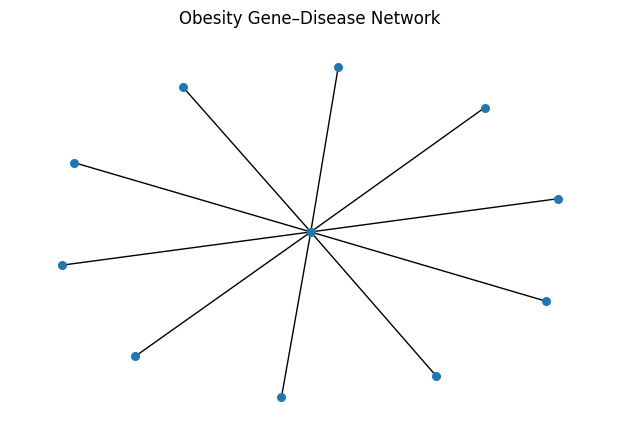

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
nx.draw(G_ob, with_labels=False, node_size=30)
plt.title("Obesity Gene–Disease Network")
plt.show()

2.type II Diabetes

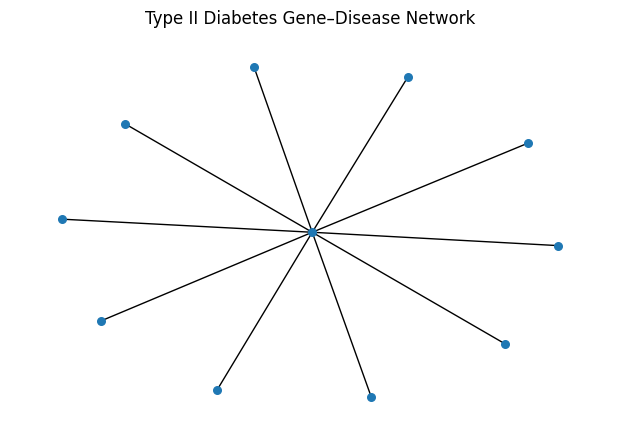

In [41]:
plt.figure(figsize=(6,4))
nx.draw(G_t2d, with_labels=False, node_size=30)
plt.title("Type II Diabetes Gene–Disease Network")
plt.show()


3.Hypertension

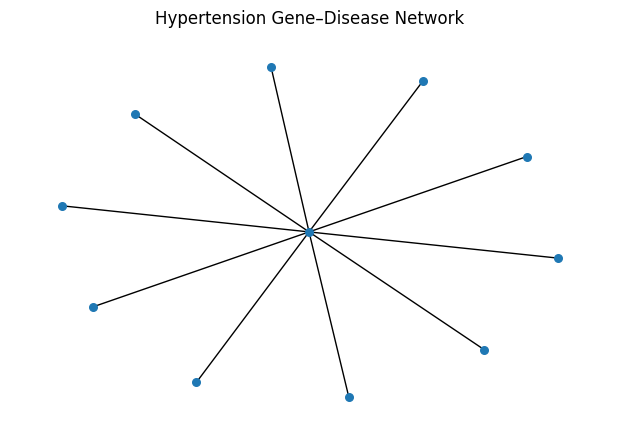

In [42]:
plt.figure(figsize=(6,4))
nx.draw(G_htn, with_labels=False, node_size=30)
plt.title("Hypertension Gene–Disease Network")
plt.show()


Deep Learning Embeddings (Node2Vec)

In [43]:
# Install the library (run once)
!pip install node2vec

# Import the module
from node2vec import Node2Vec

In [44]:
node2vec = Node2Vec(G_ob, dimensions=16, walk_length=10, num_walks=50, workers=2)
model = node2vec.fit(window=5, min_count=1)

gene = list(G_ob.nodes())[0]
print("Example gene:", gene)
print("Embedding vector:", model.wv[gene][:10])

import pandas as pd

# Create embeddings for ALL genes
genes = list(G_ob.nodes())
embeddings = [model.wv[gene] for gene in genes]

embeddings_df = pd.DataFrame(embeddings)
embeddings_df["Gene"] = genes

display(embeddings_df.head())


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Example gene: LEP
Embedding vector: [-0.10794652  0.3480922   0.2973726   0.2625127  -0.13279752 -0.11946647
  0.6084495   0.11275273  0.06958077 -0.0067922 ]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Gene
0,-0.107947,0.348092,0.297373,0.262513,-0.132798,-0.119466,0.608450,0.112753,0.069581,-0.006792,0.378772,0.164176,0.261819,0.111762,-0.513319,0.005775,LEP
1,-0.117937,0.367228,0.316635,0.402782,-0.211298,-0.151600,0.737246,0.173830,-0.001241,-0.076663,0.431337,0.115175,0.225559,0.228150,-0.584826,-0.000309,Obesity
2,-0.097113,0.307836,0.258609,0.322345,-0.158823,-0.070146,0.590591,0.062259,0.002569,-0.002203,0.314721,0.099216,0.222325,0.152170,-0.374481,0.041035,INS
3,-0.136716,0.364089,0.265889,0.345259,-0.090866,-0.042112,0.588956,0.096361,0.045466,-0.076102,0.384853,0.053121,0.265488,0.178951,-0.514077,0.033638,FTO
4,-0.082769,0.324496,0.194348,0.244525,-0.089497,-0.059311,0.657021,0.104036,0.065262,-0.068103,0.325727,0.147643,0.174369,0.140943,-0.529000,0.003837,TNF


k means clustering


In [45]:
from sklearn.cluster import KMeans

X = embeddings_df.drop(columns=["Gene"])

kmeans = KMeans(n_clusters=3, random_state=42)
embeddings_df["Cluster"] = kmeans.fit_predict(X)

display(embeddings_df.head())


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Gene,Cluster
0,-0.107947,0.348092,0.297373,0.262513,-0.132798,-0.119466,0.608450,0.112753,0.069581,-0.006792,0.378772,0.164176,0.261819,0.111762,-0.513319,0.005775,LEP,0
1,-0.117937,0.367228,0.316635,0.402782,-0.211298,-0.151600,0.737246,0.173830,-0.001241,-0.076663,0.431337,0.115175,0.225559,0.228150,-0.584826,-0.000309,Obesity,2
2,-0.097113,0.307836,0.258609,0.322345,-0.158823,-0.070146,0.590591,0.062259,0.002569,-0.002203,0.314721,0.099216,0.222325,0.152170,-0.374481,0.041035,INS,1
3,-0.136716,0.364089,0.265889,0.345259,-0.090866,-0.042112,0.588956,0.096361,0.045466,-0.076102,0.384853,0.053121,0.265488,0.178951,-0.514077,0.033638,FTO,0
4,-0.082769,0.324496,0.194348,0.244525,-0.089497,-0.059311,0.657021,0.104036,0.065262,-0.068103,0.325727,0.147643,0.174369,0.140943,-0.529000,0.003837,TNF,0


In [46]:
# Initialize Node2Vec with the Obesity gene-disease network
# dimensions: The dimensionality of the word vectors.
# walk_length: The length of random walks.
# num_walks: The number of random walks to start from each node.
# workers: The number of parallel workers for training.
node2vec = Node2Vec(G_ob, dimensions=16, walk_length=10, num_walks=50, workers=2)

# Fit the Node2Vec model to the network
# window: The maximum distance between the current and predicted word within a sentence.
# min_count: Ignores all words with total frequency lower than this.
model = node2vec.fit(window=5, min_count=1)

# Get the first gene from the network nodes
gene = list(G_ob.nodes())[0]
print("Example gene:", gene)

# Print the first 10 values of the embedding vector for the example gene
print("Embedding vector:", model.wv[gene][:10])

Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Example gene: LEP
Embedding vector: [-0.15743393  0.30216452  0.18606     0.33135763 -0.18739738 -0.02532203
  0.61621654 -0.00067167  0.0841563  -0.02761534]


In [47]:
import numpy, gensim
from node2vec import Node2Vec
print("numpy:", numpy.__version__)
print("gensim:", gensim.__version__)
print("node2vec: Node2Vec imported successfully")

numpy: 1.26.4
gensim: 4.4.0
node2vec: Node2Vec imported successfully


In [48]:
from node2vec import Node2Vec

node2vec = Node2Vec(G_ob, dimensions=16, walk_length=10, num_walks=50, workers=2)
model = node2vec.fit(window=5, min_count=1)

gene = list(G_ob.nodes())[0]
print("Example gene:", gene)
print("Embedding vector:", model.wv[gene][:10])  # first 10 values

Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Example gene: LEP
Embedding vector: [-0.11065236  0.35108063 -0.0523625   0.3454697  -0.12845877  0.11789369
  0.59647715  0.10463329  0.1702668  -0.3445645 ]


Compare gene overlaps

In [49]:
genes_ob = set(ob['gene_symbol'])
genes_t2d = set(t2d['gene_symbol'])
genes_htn = set(htn['gene_symbol'])

print("Common genes (Obesity & T2DM):", len(genes_ob & genes_t2d))
print("Common genes (Obesity & Hypertension):", len(genes_ob & genes_htn))
print("Common genes (T2DM & Hypertension):", len(genes_t2d & genes_htn))

Common genes (Obesity & T2DM): 10
Common genes (Obesity & Hypertension): 10
Common genes (T2DM & Hypertension): 10


Visualize overlaps

In [50]:
!pip install venn

<Axes: >

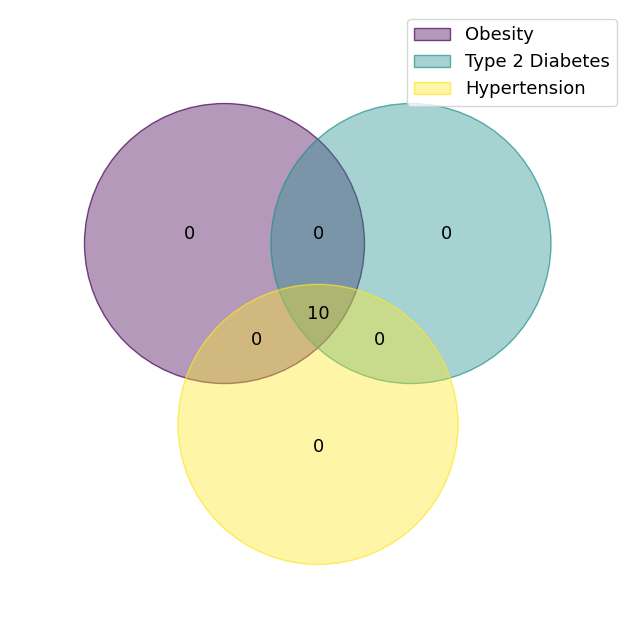

In [51]:
import venn
venn.venn({
    "Obesity": genes_ob,
    "Type 2 Diabetes": genes_t2d,
    "Hypertension": genes_htn
})

Shared Hub Gene Analysis

In [52]:
shared_genes = set(G_ob.nodes()) & set(G_t2d.nodes()) & set(G_htn.nodes())

shared_hubs = obesity_metrics[obesity_metrics["Gene"].isin(shared_genes)]
display(shared_hubs.head())

,Gene,Degree,Betweenness
0,LEP,1,0.0
2,INS,1,0.0
3,FTO,1,0.0
4,TNF,1,0.0
5,CRP,1,0.0


conclusion

Network analysis revealed shared hub genes among metabolic disorders, indicating possible common molecular mechanisms. Graph embeddings further captured latent gene similarities, supporting the role of network-based approaches in metabolic disease research.
